In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

In [6]:
# 1️⃣ Load selected dataset
df = pd.read_csv("../data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
# 2️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# 3️⃣ Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [9]:
# 4️⃣ Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!



Logistic Regression Evaluation:
Accuracy: 0.6
Precision (macro): 0.26690476190476187
Recall (macro): 0.2741269841269841
F1 Score (macro): 0.26945344129554655
ROC AUC (OvR): 0.8117289271551057

Decision Tree Evaluation:
Accuracy: 0.5333333333333333
Precision (macro): 0.2509922756981581
Recall (macro): 0.2519047619047619
F1 Score (macro): 0.2507142857142857
ROC AUC (OvR): 0.5556440346478535

Random Forest Evaluation:
Accuracy: 0.6333333333333333
Precision (macro): 0.2815018315018315
Recall (macro): 0.29047619047619044
F1 Score (macro): 0.2855350140056022
ROC AUC (OvR): 0.7963534902852035

SVM Evaluation:
Accuracy: 0.6833333333333333
Precision (macro): 0.380952380952381
Recall (macro): 0.3823809523809524
F1 Score (macro): 0.3790903540903541
ROC AUC (OvR): 0.8281962867529927


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


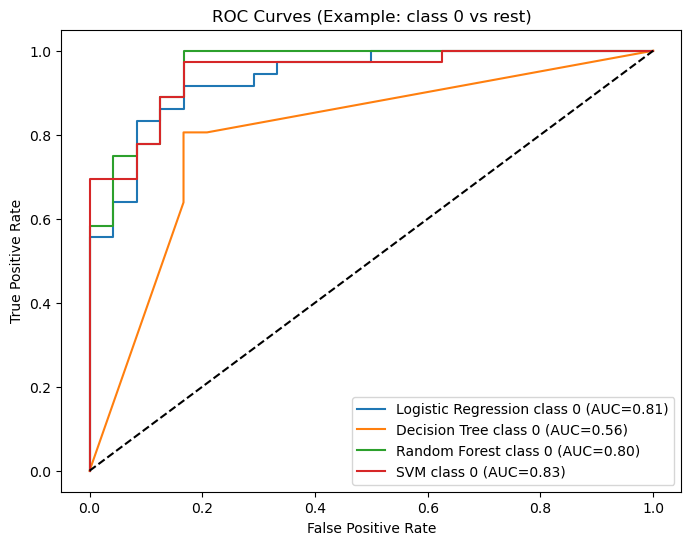

In [10]:
# 5️⃣ Evaluate models
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    
    # ROC-AUC for multiclass (if model supports probability)
    if hasattr(model, "predict_proba"):
        try:
            y_prob = model.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
            print("ROC AUC (OvR):", auc)
            
            # ROC curve plotting for class 0 vs rest (example)
            fpr, tpr, _ = roc_curve(y_test==0, y_prob[:,0])
            plt.plot(fpr, tpr, label=f"{name} class 0 (AUC={auc:.2f})")
        except:
            print("ROC AUC not computed for this model.")

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Example: class 0 vs rest)")
plt.legend()
plt.show()

In [11]:
# 6️⃣ Save models
os.makedirs("../models", exist_ok=True)
for name, model in models.items():
    joblib.dump(model, f"../models/{name.replace(' ','_').lower()}.pkl")
print("All models saved successfully!")


All models saved successfully!
